# Tu primer árbol de decisión con scikit-learn

In [1]:
#Importamos las librerias principales
import pandas as pd
import matplotlib.pyplot as plt

Utilizaremos el **dataset Titanic** de Standford: https://web.stanford.edu/class/archive/cs/cs109/cs109.1166/problem12.html

In [2]:
#Cargamos dataset a utilizar
titanic = pd.read_csv('https://raw.githubusercontent.com/Patchwtf/MachineLearningProyects/refs/heads/main/Resources/titanic.csv')

## Exploración de datos

In [3]:
#Visualizacion del DataFrame
titanic.head(5)

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


In [4]:
#Eliminamos las columnas que no nos interesan
columns_to_drop = ['Name', 'Fare']
titanic.drop(columns_to_drop, axis = 'columns', inplace=True)

In [5]:
#Renombramos las columnas
titanic.columns = ['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch']
titanic.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch
0,0,3,male,22.0,1,0
1,1,1,female,38.0,1,0
2,1,3,female,26.0,0,0
3,1,1,female,35.0,1,0
4,0,3,male,35.0,0,0


In [6]:
#Analizamos el shape del objeto
titanic.shape

(887, 6)

In [7]:
#Visualizamos los tipos de datos
titanic.dtypes

,0
Survived,int64
Pclass,int64
Sex,object
Age,float64
SibSp,int64
Parch,int64


In [8]:
#Cambiamos los tipos de datos
titanic = pd.get_dummies(titanic, columns=['Sex'], drop_first=True)

In [13]:
titanic.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch
0,0,3,True,22.0,1,0
1,1,1,False,38.0,1,0
2,1,3,False,26.0,0,0
3,1,1,False,35.0,1,0
4,0,3,True,35.0,0,0


In [10]:
titanic.dtypes

,0
Survived,int64
Pclass,int64
Age,float64
SibSp,int64
Parch,int64
Sex_male,bool


In [11]:
#Reemplazar el DataFrame
titanic.rename(columns={'Sex_male':'Sex'}, inplace=True)

In [12]:
#Ordenar columnas por nombres
titanic = titanic[['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch']]

## Entrenamiento de árbol de decisión con scikit-learn

In [21]:
#Separamos en X e y
X = titanic.drop('Survived', axis= 1)
Y = titanic.Survived

In [22]:
#Importamos las librerias necesarias para la creacion del modelo
from sklearn.model_selection import train_test_split

#30% para test y 70% para train
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state= 00000)


In [23]:
#Arbol de Decision
from sklearn.tree import DecisionTreeClassifier

#Creacion del modelo
tree = DecisionTreeClassifier(max_depth=2, random_state= 00000)

In [24]:
#Entrenamiento

tree.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=0)

## Evaluación del modelo

In [25]:
#Calculo de las predicciones en Train y Test
y_train_pred = tree.predict(x_train)
y_test_pred = tree.predict(x_test)

In [28]:
#Calculo de metricas
from sklearn.metrics import accuracy_score

#Calculo el accuracy en Train
train_accuracy = accuracy_score(y_train, y_train_pred)

#Calculo el accuracy en Test
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f'El accuracy en train es ${train_accuracy} y el accuracy en test es: ${test_accuracy}')

El accuracy en train es $0.8048387096774193 y el accuracy en test es: $0.7640449438202247


Text(0.5, 1.0, 'Importancia de cada Feature')

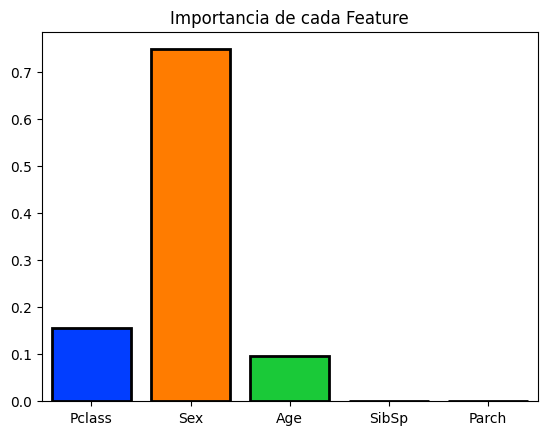

In [33]:
#Verificamos el feature importances
import seaborn as sns

importances = tree.feature_importances_
columns = X.columns
data = pd.DataFrame([importances], columns=columns)


sns.barplot(data, palette= 'bright', saturation=2.0, edgecolor='black', linewidth= 2)
plt.title('Importancia de cada Feature')

**¿Que podemos llevarnos de este ejemplo?**

Podemos observar que para la clasificación del modelo en base a la variable target: Survived, los features más importantes son: Sex, seguido de Pclass y luego de Age. Tambien es importante destacar que se observa una performance parecida en la métrica de Accuracy para los datos de Train y de Test, lo cual es claramente positivo para nuestro modelo.